# Part I - Ford GoBike System Data
## by Daniel Kiraithe

## Introduction
Ford GoBike System Data is data set that includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The data is for the year 2019 meaning the basic user information such as age reflects that date. It contains some 183,412 trips taken during the period. The data set can be accessed from https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv  



## Preliminary Wrangling
The data was gathered from the above source as a csv file and loaded into pandas DataFrame. Basic data structure was assessed both visually and programtically to detect tidiness and quality issues that could affect the outcomes of the analyis. Some observations that include: Data shape (183412,16, some incorrect data types (eg. date type), missing values, missing crucial columns (eg. age), and no duplicated values were all noted. There was need to clean some data columns and create new columns  to explore the data better. For instce, columns for member_age, duration_min, and duration_hrs were created and missing values were filled appropraitely. he folowing procedure was adopted using question and answer approach to explore the data set. 


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### Data Loading 


In [3]:
data= pd.read_csv('201902-fordgobike-tripdata.csv')
data.head()
bikes_df= pd.DataFrame(data)
bikes_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


#### How many rows and columns are there in the dataset?

In [4]:
bikes_df.shape

(183412, 16)

#### There are 183,412 rows and 16 columns in the data set. 

#### What is the description of the data types in the columns?

In [6]:
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


#### The data structure has 7 data types of nature float, 7 objects, and 2 int meaning it is mostly numerical data

#### Are there columns with missing values?

In [7]:
bikes_df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

#### There are several columns with missing values 

### Are there duplicated values in the data set?

In [8]:
bikes_df.duplicated().sum()

0

#### There are no duplicated data in the data set

#### What is the descriptive statitics of the data set?

In [9]:
bikes_df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


#### - The minimum duration in seconds is 61 seconds (almost 1 min) and the maximum us 85,444 (almost 24 ours)
#### -The average trip duration in seconds is 726. seconds
#### - There is need to clean some data columns and create new columns such as member Age and duration of trip columns to explore the data better

#### Cleaning For Analysis

In [15]:
# Filling missing values 
for na_val in ["end_station_id", "start_station_id", "start_station_name", "end_station_name", "member_birth_year"]:
    bikes_df[na_val] = bikes_df[na_val].fillna(bikes_df[na_val].mode()[0])

In [16]:
# Testing results 
# Testing 
bikes_df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id              0
start_station_name            0
start_station_latitude        0
start_station_longitude       0
end_station_id                0
end_station_name              0
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year             0
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [17]:
# Member gender is to be filled using mode
bikes_df.member_gender.mode()

0    Male
dtype: object

In [18]:
# Mode is male
# Fill missing values with male in the gender column
bikes_df["member_gender"] = bikes_df["member_gender"].fillna("Male")
# Testing 
bikes_df.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [19]:
# Gender data type should be cleaned 
bikes_df.member_gender = bikes_df.member_gender.astype('category')

In [20]:
# User type data type needs to be cleaned
bikes_df.user_type = bikes_df.user_type.astype('category')

In [22]:
# Start_time and end_time should be time data type
bikes_df.start_time = pd.to_datetime(bikes_df.start_time)
bikes_df.end_time = pd.to_datetime(bikes_df.end_time)

In [23]:
# Testing 
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183412 non-null float64
start_station_name         183412 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183412 non-null float64
end_station_name           183412 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null category
member_birth_year          183412 non-null float64
member_gender              183412 non-null category
bike_share_for_all_trip    183412 non-null object
dtypes: category(2), datetime64[ns](2), float64(7), int64(2), ob

In [57]:
# Creating a column for Member age 
bikes_df['member_age'] = 2019 - bikes_df['member_birth_year']
bikes_df.member_age = bikes_df.member_age.astype('int64')

In [58]:
# Creating a column to visualize the trip length in minutes 
bikes_df['duration_min'] =bikes_df['duration_sec']/60 
#bikes_df.duration_min = bikes_df.duration_min.astype('int64')

In [59]:
# Creating a column to visualize trip length in hours
bikes_df['duration_hrs'] =bikes_df['duration_sec']/3600 
#bikes_df.duration_hrs = bikes_df.duration_hrs.astype('int64')

In [60]:
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 19 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183412 non-null float64
start_station_name         183412 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183412 non-null float64
end_station_name           183412 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null category
member_birth_year          183412 non-null float64
member_gender              183412 non-null category
bike_share_for_all_trip    183412 non-null object
member_age                 183412 non-null int64
duration_min   

In [61]:
# member_age, duration_min, duration_hrs should all be  intenger data type

### Univariate Exploration 
#### 1. What is the distribution for duration of trips in sec?
#### 2. What is the distribution for duration of trips in Minutes?
#### 3. What is the distribution for duration of trips in Hours?
#### 4. What is the distribution for member_age?
#### 5. What is the distribution for member_gender?
#### 6. Wahat is the distribution of User type?
#### 7. What is the distribution of Bikes shares among users?

### Univariate Exploration 
#### 1. What is the distribution for duration of trips in sec?


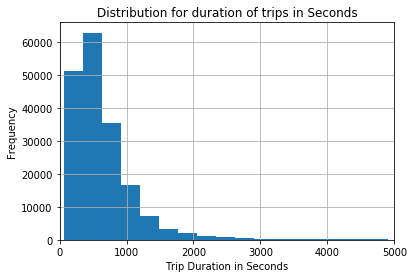

In [62]:
bikes_df['duration_sec'].hist(bins=300)
plt.xlim(0, 5000)
plt.xlabel('Trip Duration in Seconds')
plt.ylabel('Frequency')
plt.title("Distribution for duration of trips in Seconds")

plt.show()

#### Majority of trips were less than 1000 seconds in length.

#### 2. What is the distribution for duration of trips in Minutes?


Text(0.5,1,'Distribution for duration of trips in Minutes')

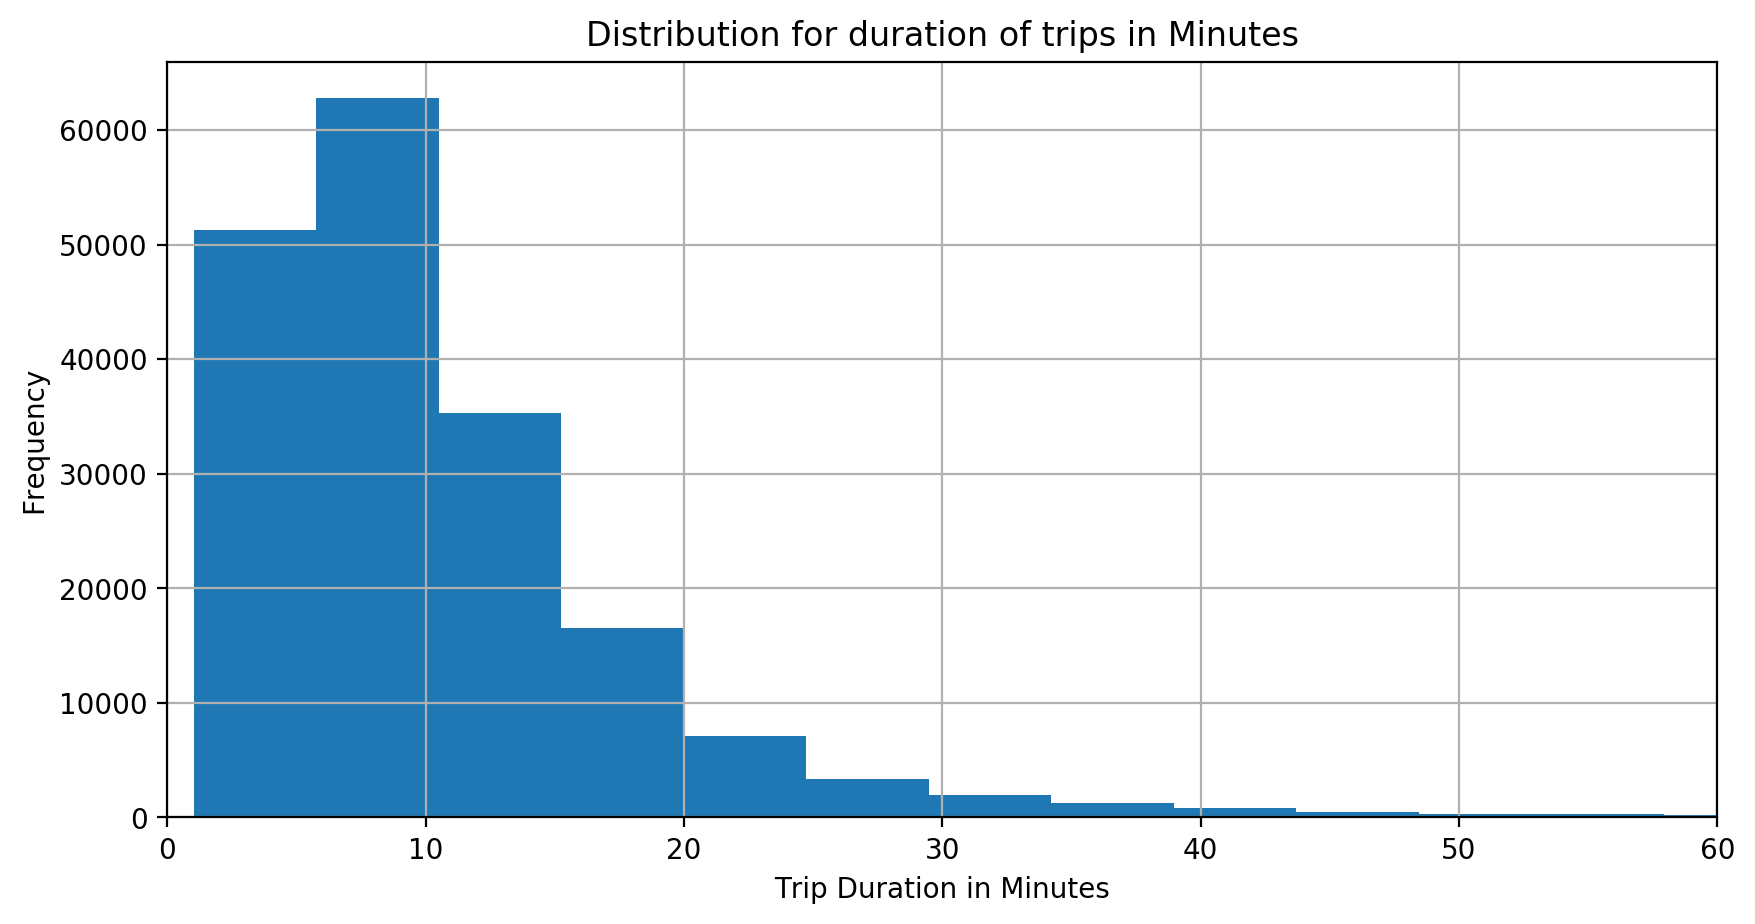

In [63]:
plt.figure(figsize = (10,5), dpi = 200)

bikes_df['duration_min'].hist(bins=300)
plt.xlim(0, 60)
plt.xlabel('Trip Duration in Minutes')
plt.ylabel('Frequency')
plt.title("Distribution for duration of trips in Minutes")


#### Majority of trips lasted more than 10 minutes but less than 20 minutes

#### 3. What is the distribution for duration of trips in Hours?


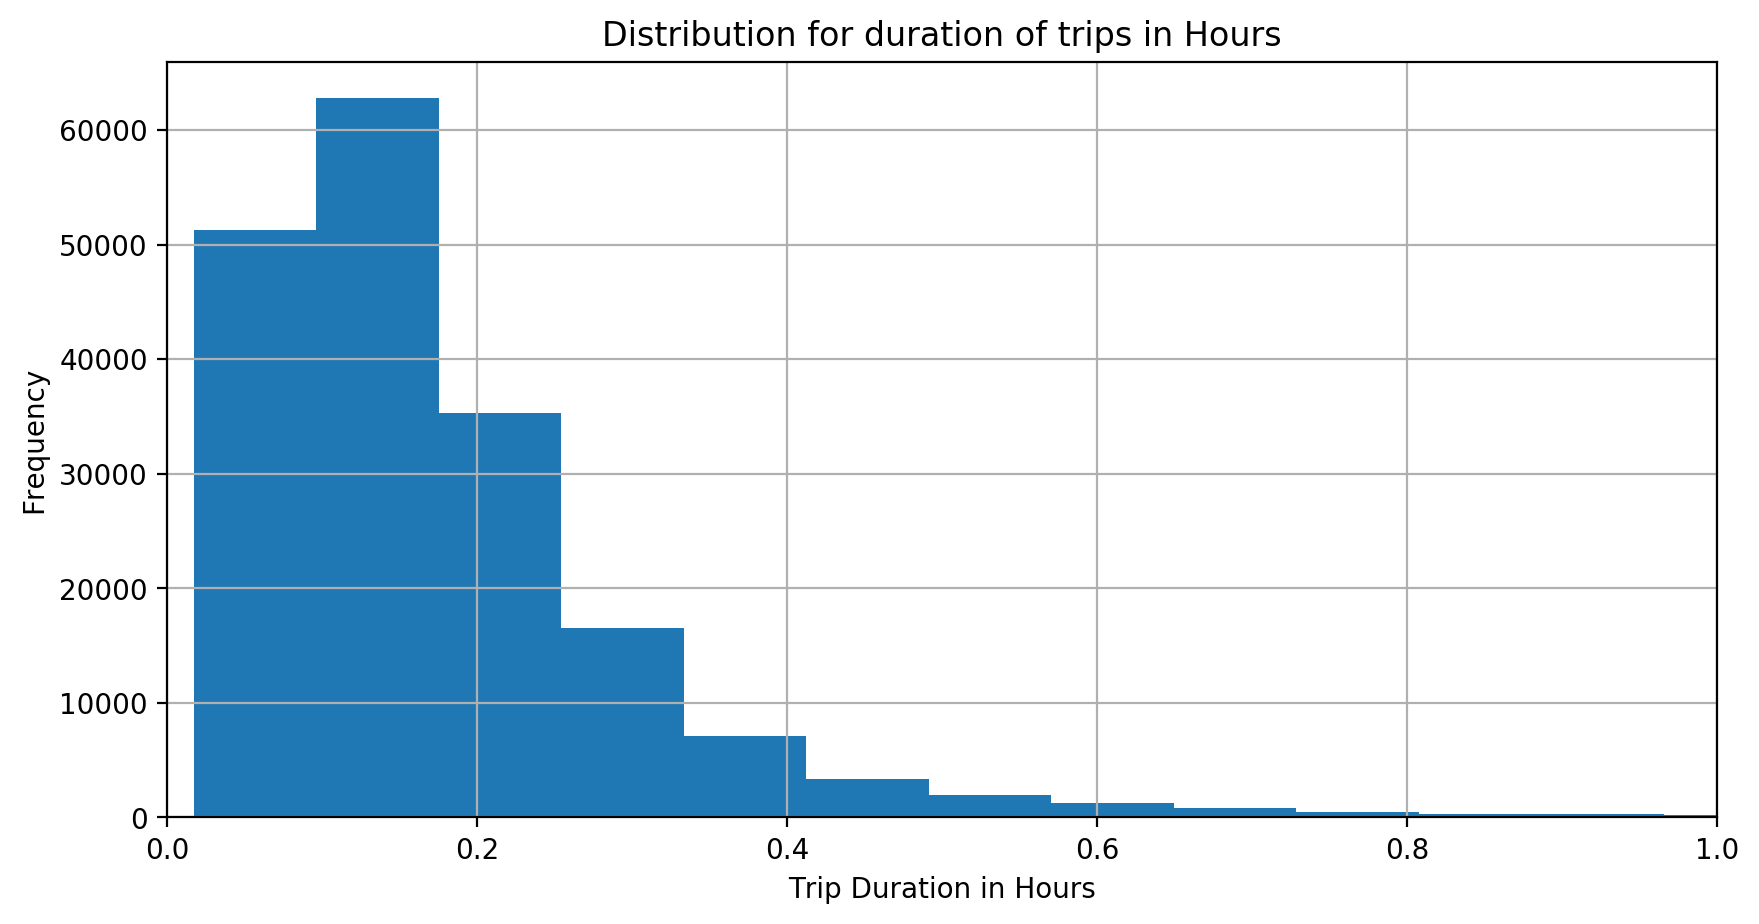

In [66]:
plt.figure(figsize = (10,5), dpi = 200)
bikes_df['duration_hrs'].hist(bins= 300)
plt.xlim(0, 1)
plt.xlabel('Trip Duration in Hours')
plt.ylabel('Frequency')
plt.title("Distribution for duration of trips in Hours")
plt.show()

Most trips lasted about a quarter an hour which is about 15 minutes 
Majority members take trips of between 20 and 30 minutes. Very few who take trips lasting more than 30 minutes

#### 4. What is the distribution for member_age?


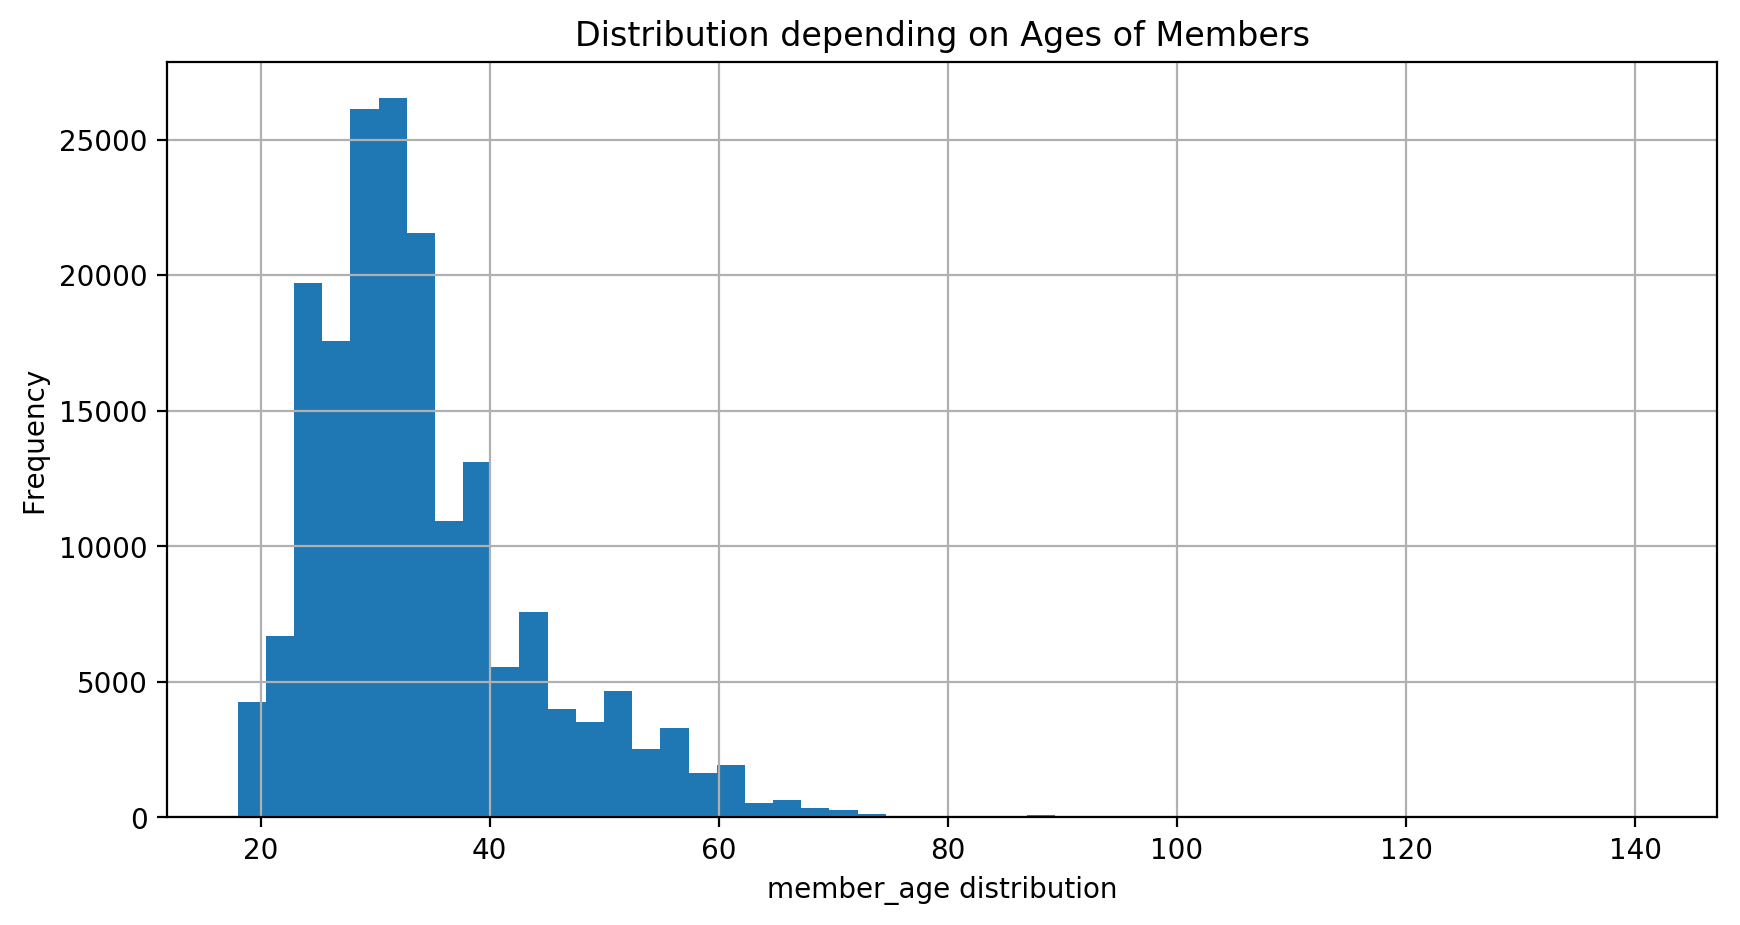

In [67]:
plt.figure(figsize = (10,5), dpi = 200)

bikes_df['member_age'].hist(bins= 50);
plt.xlabel('member_age distribution')
plt.ylabel('Frequency')
plt.title("Distribution depending on Ages of Members")

plt.show()

Majority members are youth aged betwen 25 and 35 years.

### Could there be age outlier values?

In [79]:
bikes_df.query ("member_age >=100").index

Int64Index([  1285,  10827,  16087,  19375,  21424,  21506,  24042,  26133,
             27370,  27675,  29716,  32285,  32725,  32809,  32942,  34747,
             38932,  41194,  41246,  41319,  43880,  45846,  48804,  58222,
             60960,  61611,  62598,  66700,  72711,  72819,  73755,  75686,
             78897,  88152,  92611,  93193,  94326,  94616,  97721,  97997,
            101242, 102148, 107359, 107619, 108314, 109010, 110468, 110734,
            114762, 115637, 119010, 122194, 123240, 128986, 137804, 138297,
            140748, 145510, 147519, 150108, 151936, 161505, 162051, 163112,
            167178, 171086, 171757, 171996, 173711, 177708, 177885, 182830],
           dtype='int64')

In [82]:
l_find=(bikes_df.member_age >=100)
col = ['member_age','duration_min', 'user_type', 'member_gender']
bikes_df[l_find][col]

,member_age,duration_min,user_type,member_gender
1285,119,2.466667,Subscriber,Male
10827,119,21.916667,Subscriber,Male
16087,119,18.850000,Subscriber,Male
19375,119,10.683333,Customer,Male
21424,119,23.733333,Subscriber,Male
21506,119,11.683333,Customer,Male
24042,119,3.233333,Subscriber,Male
26133,119,6.833333,Subscriber,Male
27370,141,24.566667,Customer,Female
27675,119,18.116667,Subscriber,Male


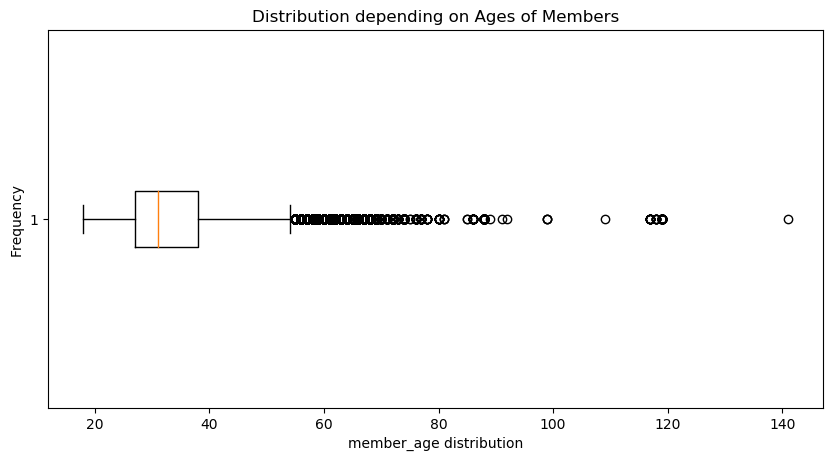

In [68]:
plt.figure(figsize = (10,5), dpi = 100)

plt.boxplot(bikes_df['member_age'], vert=False)

plt.xlabel('member_age distribution')
plt.ylabel('Frequency')
plt.title("Distribution depending on Ages of Members")

plt.show()

Members age is left skewed. Majority members are between 25 and 35 years. The avearge age is 34 years witth a minimum age of 18 and maximum 141 years (outlier) 


#### 5. What is the distribution for member_gender?


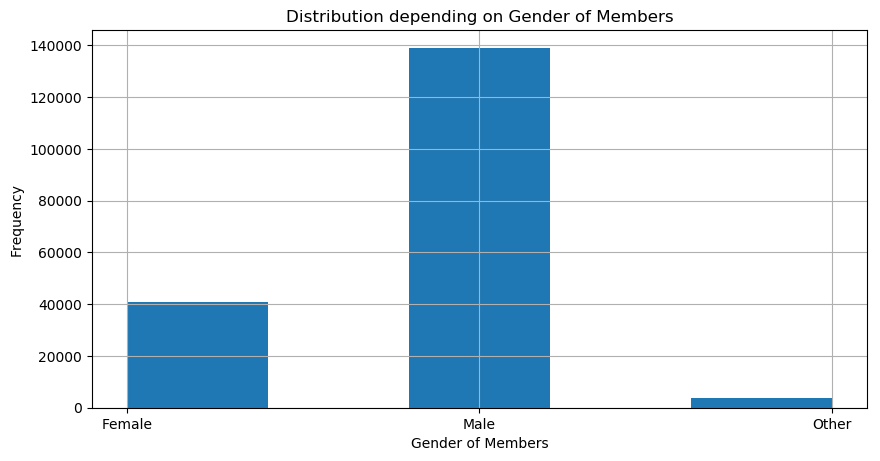

In [69]:
plt.figure(figsize = (10,5), dpi = 100)

bikes_df['member_gender'].hist(bins= 5);

plt.xlabel('Gender of Members')
plt.ylabel('Frequency')
plt.title("Distribution depending on Gender of Members")

plt.show()


Majority members were male followed by female and a negligible number of members identifying their gender as others


#### 6. Wahat is the distribution of User type?

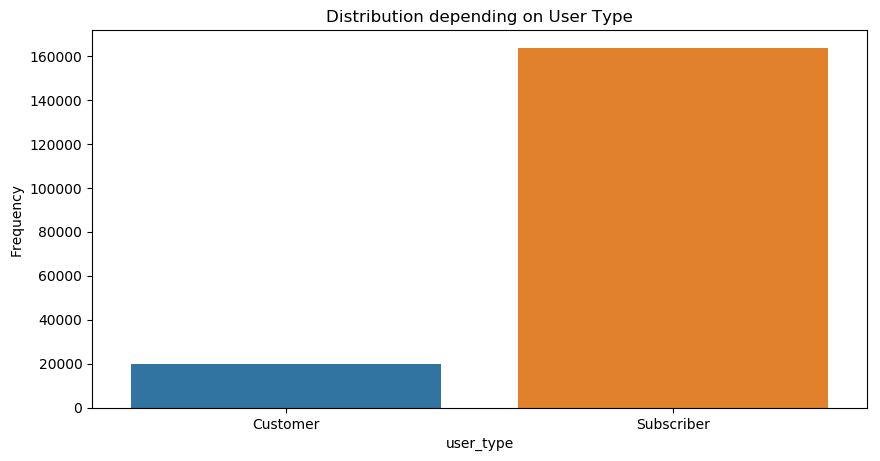

In [70]:
plt.figure(figsize = (10,5), dpi = 100)
plot = sb.countplot(data=bikes_df, x='user_type')
plt.xlabel('user_type')
plt.ylabel('Frequency')
plt.title("Distribution depending on User Type")

plt.show()

There are almost 8 times subcribers as customers. 


#### 7. What is the distribution of Bikes shares among users?

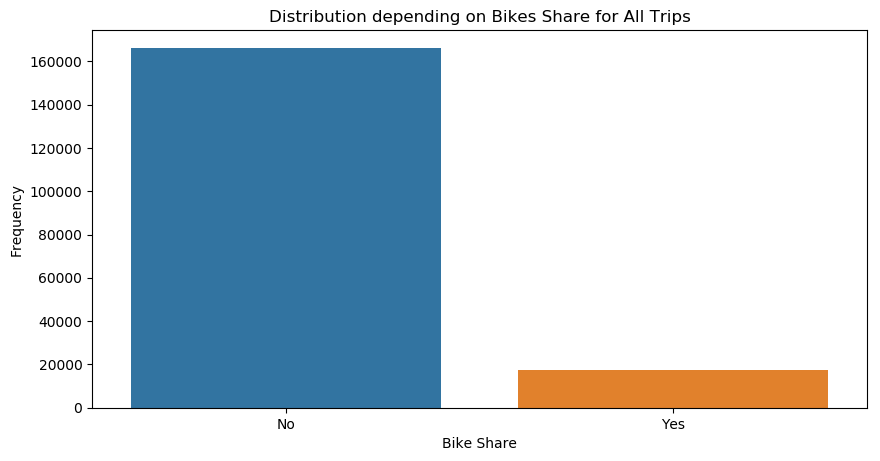

In [71]:
plt.figure(figsize = (10,5), dpi = 100)
plot = sb.countplot(data=bikes_df, x='bike_share_for_all_trip')
plt.xlabel('Bike Share')
plt.ylabel('Frequency')
plt.title("Distribution depending on Bikes Share for All Trips")

plt.show()

Most bikes are not shared

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The member_age column had an outlier of more than 140 while the minimum was 18. It means the member could cycle at his/her age of 146 years. This was interesting to note. I would l queried more details of the memebers aged more than 100 and found 72 rows!. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The data was not further cleaned for potential cupture of the same client wih relatively high values of age (above 100) because there was no data to suport it was a repetition or duplication. 

## Bivariate Exploration

In this section, I investigate relationships between pairs of variables in my 
data. The variables have already been introduced in the univariate exploration section

#### 8. How is the length of Trip in minutes associated with different Gender?
#### 9. How is the length of Trip in minutes associated with different User Types?
####  10. How do member ages  look across different user types?
####  11. What is the distribution of gender in relation to user_type?

###### Lets explore each separately

#### 8. How is the length of Trip in minutes associated with different Gender?


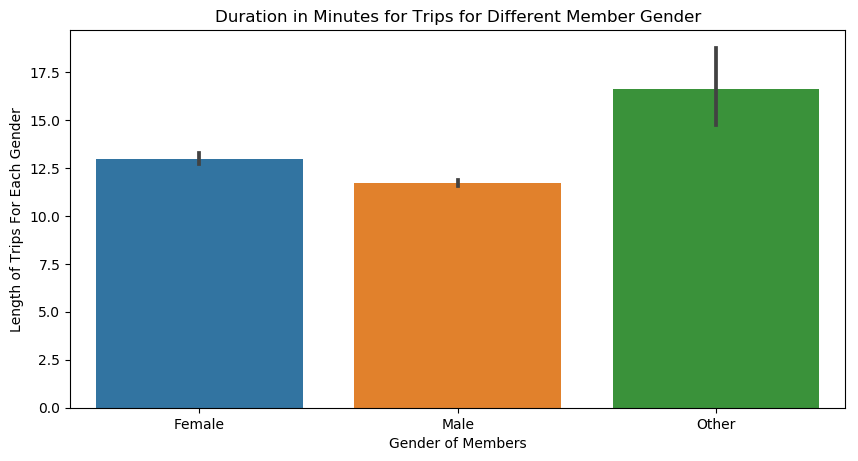

In [83]:
plt.figure(figsize = (10,5), dpi = 100)

sb.barplot(data = bikes_df, x = "member_gender", y = "duration_min")

plt.xlabel('Gender of Members')

plt.ylabel('Length of Trips For Each Gender')


plt.title("Duration in Minutes for Trips for Different Member Gender")

plt.show()

Members of Male Gender took averagely the shortest trips followed by female while other gender took the longest. 

#### 9. How is the length of Trip in minutes associated with different User Types?


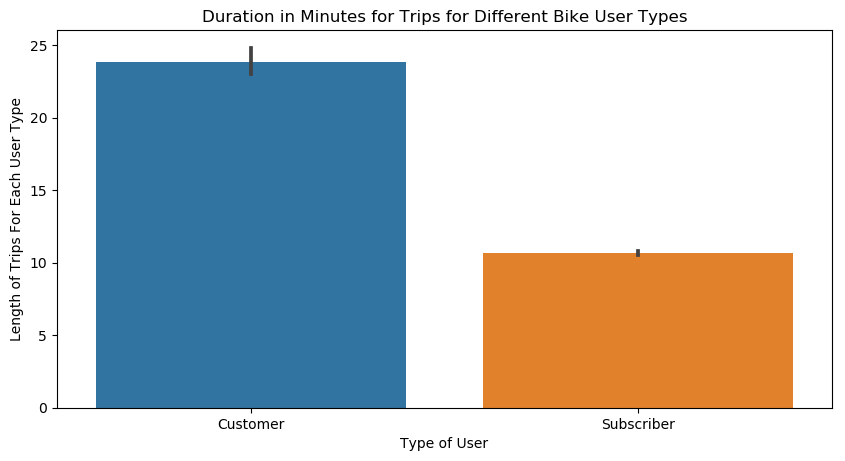

In [84]:
plt.figure(figsize = (10,5), dpi = 100)

sb.barplot(data = bikes_df, x = "user_type", y = "duration_min")

plt.xlabel('Type of User')

plt.ylabel('Length of Trips For Each User Type')


plt.title("Duration in Minutes for Trips for Different Bike User Types")

plt.show()

Customers take longer durations of trips in minutes than Subscriber counterparts

####  10. How do member ages  look across different user types?


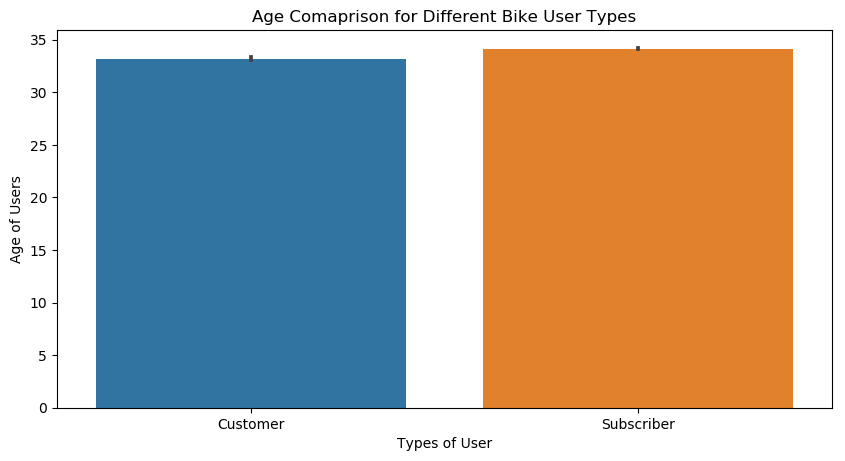

In [85]:
plt.figure(figsize = (10,5), dpi = 100)

sb.barplot(data = bikes_df, x = "user_type", y = "member_age")

plt.xlabel('Types of User')

plt.ylabel('Age of Users')


plt.title("Age Comaprison for Different Bike User Types")

plt.show()

Customers are slightly younger than subscribers

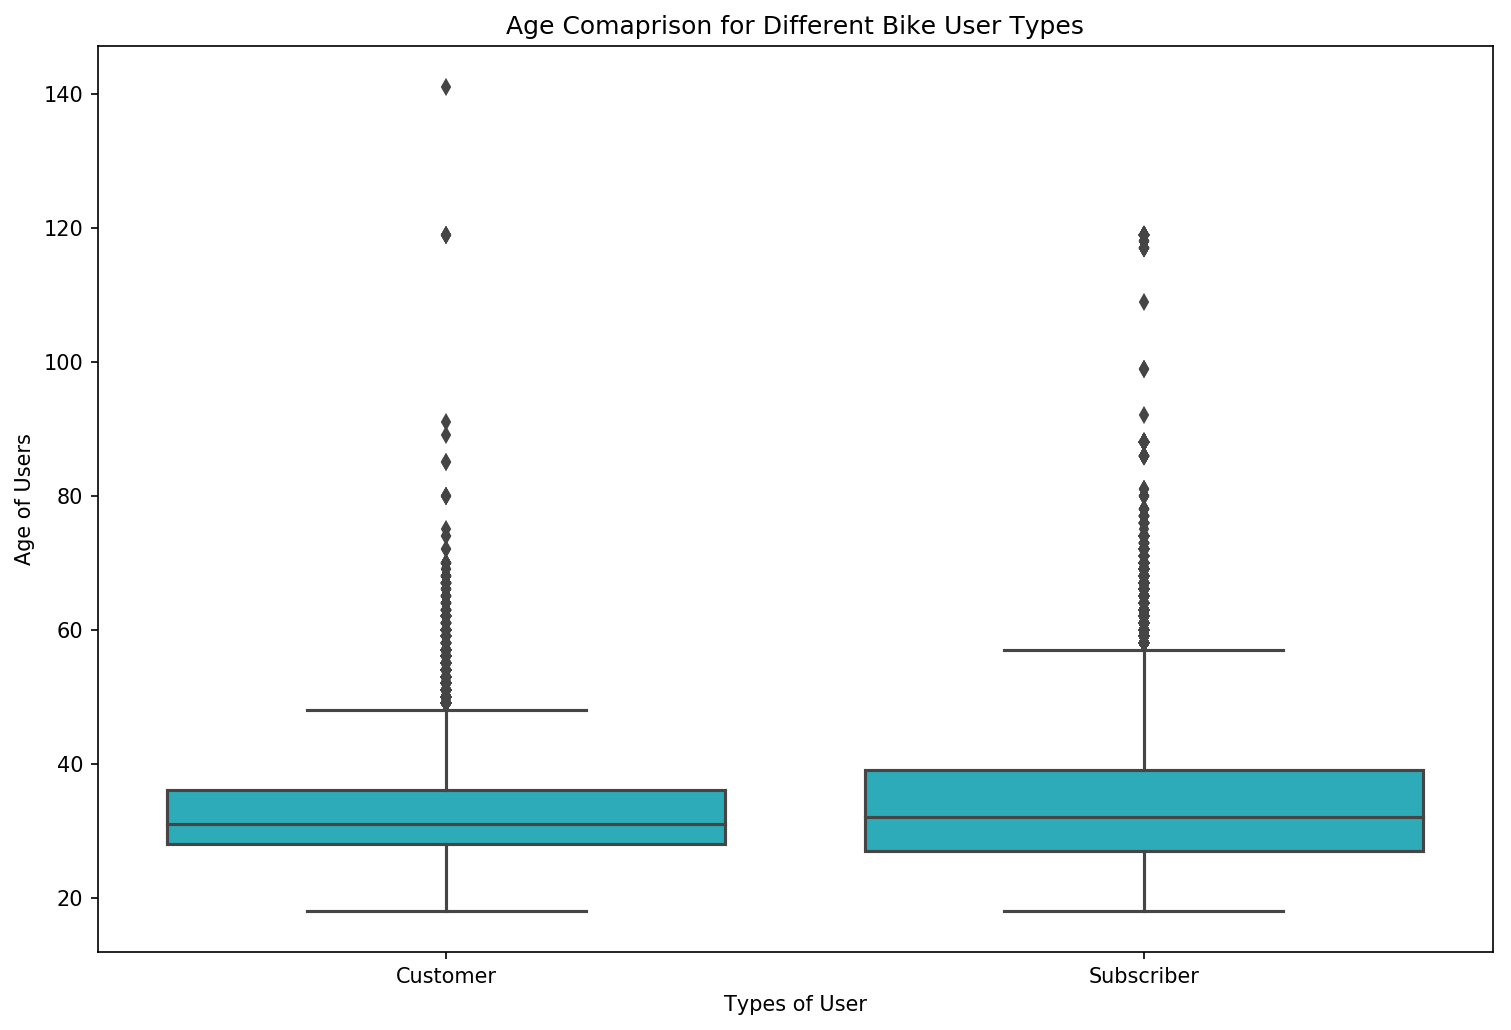

In [88]:
plt.figure(figsize = (12, 8), dpi = 150)
base_color = sb.color_palette()[9]
sb.boxplot(data = bikes_df, x = "user_type", y = "member_age", color=base_color)

plt.xlabel('Types of User')

plt.ylabel('Age of Users')


plt.title("Age Comaprison for Different Bike User Types")

plt.show()

Extremly old members are customers

####  11. What is the distribution of gender in relation to user_type?

In [97]:
sb.countplot(binwidth=0.5, x="user_type", hue="member_gender", data=bikes_df, stat="count", multiple="dodge")


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Although the customer segment has a relatively younger group, it is the one that has more members aged over 100. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

It was interesting to note that male users took teh shortest trips on average compared to other gender

## Multivariate Exploration

I Create plots of three or more variables to investigate data even
further. 

How do various variables in the data set corelate?

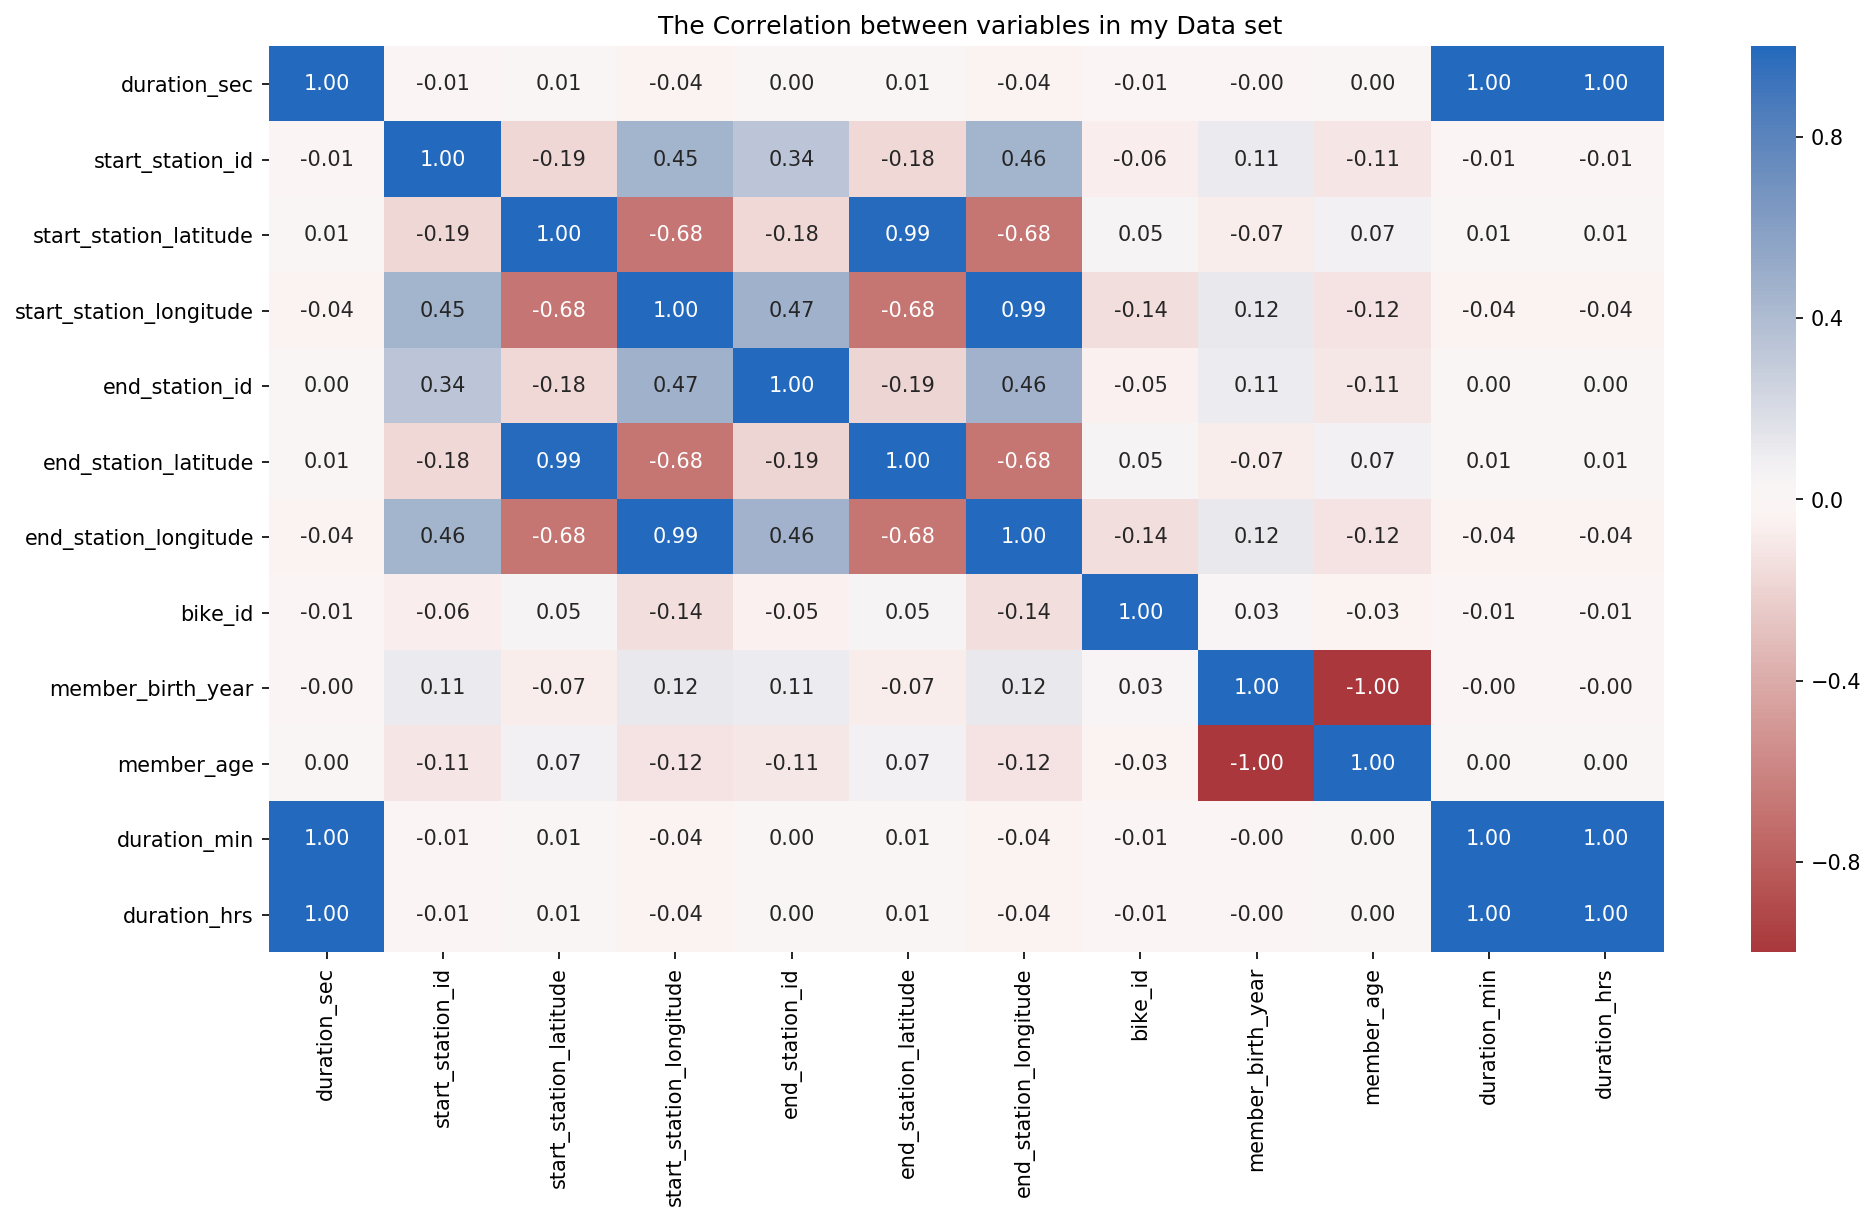

In [98]:
# Explaring the Corelation between all varriables in the data set visually
plt.figure(figsize = (15,8), dpi = 150)

sb.heatmap(bikes_df.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)

plt.title(" The Correlation between variables in my Data set")

plt.xticks(rotation = 90)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

How are the variables: Gender, year of birth, age, duration of trip in minutes, and bike_id correlate?

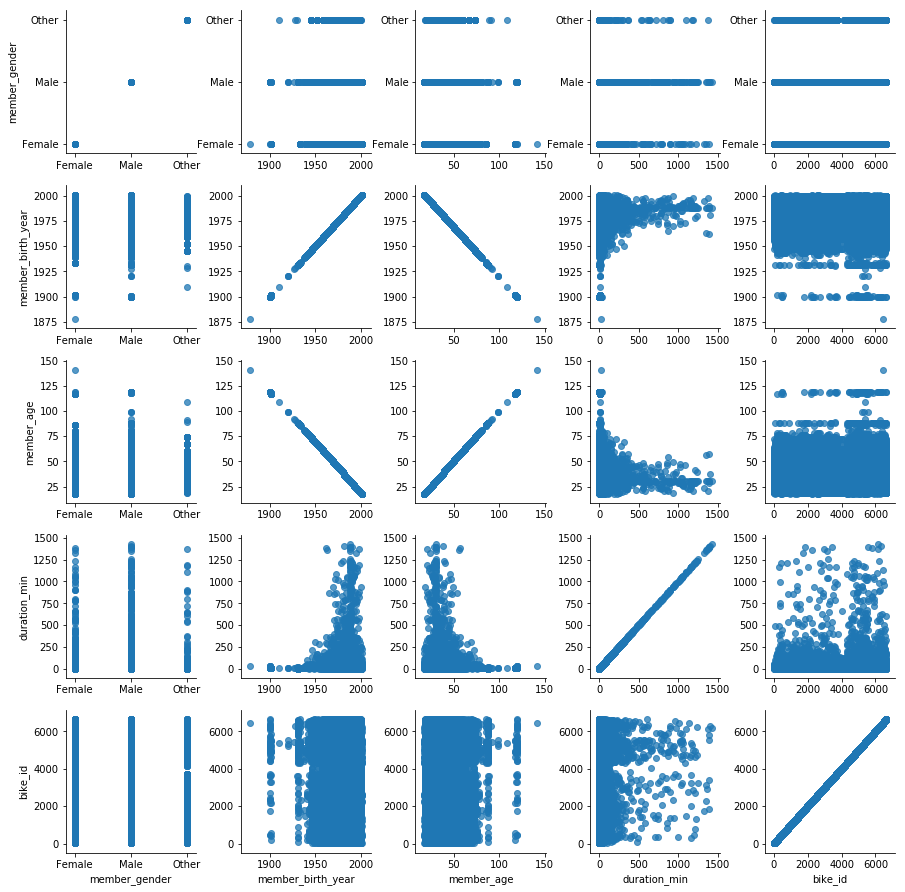

In [99]:
cor_values= ['member_gender','member_birth_year', 'member_age', 'duration_min','bike_id']
p = sb.PairGrid(data= bikes_df, vars= cor_values);
p.map(plt.scatter, alpha = 0.75);

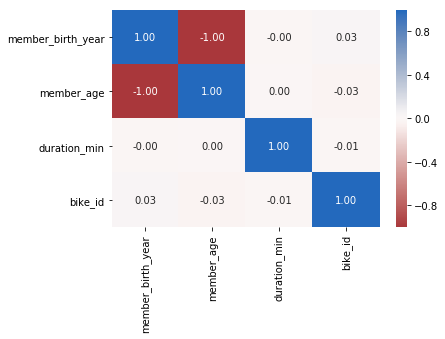

In [100]:
sb.heatmap(bikes_df[cor_values].corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- The heatmap above shows how variables in the data set are correlated.
- Duration has no correlation with other variables
- There is a strong negative corelation between the member_age and member_birth_year
- start_staion_longitude is postively strongly correlated with end_station_longitude (0.99) meaning it can be further investigated
- start_staion_id, start_staion_longitude, and end_station_longitude are weakly correlated postively

### Were there any interesting or surprising interactions between features?

Member age and year of birth are perfectly correlated negatively 

## Conclusions
Majority of trips were less than 1000 seconds in length
Members age is left skewed. Majority members are between 25 and 35 years. The avearge age is 34 years witth a minimum age of 18 and maximum 141 years (outlier)
Members of Male Gender took averagely the shortest trips 

